In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
import string

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PabloFabianFaundezGa\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Define file path
file_path = "data/raw/deu_mixed-typical_2011_10K-sentences.txt"

with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Define and separate columns in dataframe
data = pd.DataFrame([line.strip().split("\t", 1) for line in lines if "\t" in line], columns=["ID", "Sentence"])

# ID to integer
data["ID"] = data["ID"].astype(int)

print(data.head())

   ID                                           Sentence
0   1              105 Millionen Euro werden investiert.
1   2  1343 wurde der Zentralturm der Kathedrale erri...
2   3  1841 wurde die erste Lokomotive in München geb...
3   4                             1849 starb seine Frau.
4   5           1867 wurde ein Amtsgericht eingerichtet.


In [5]:
# Dataset summary
summary = {
    "Total Sentences": len(data),
    "Average Sentence Length": data["Sentence"].apply(len).mean(),
    "Max Sentence Length": data["Sentence"].apply(len).max(),
    "Min Sentence Length": data["Sentence"].apply(len).min(),
}

print(summary)

{'Total Sentences': 10000, 'Average Sentence Length': 47.4184, 'Max Sentence Length': 134, 'Min Sentence Length': 11}


In [6]:
# Words per Sentences
data["Word Count"] = data["Sentence"].apply(lambda x: len(nltk.word_tokenize(x)))

# Corpus creation
all_words = " ".join(data["Sentence"]).lower().translate(str.maketrans("", "", string.punctuation))

# Frecquency count
word_counts = Counter(all_words.split())

# Top 20 most freq words
common_words = pd.DataFrame(word_counts.most_common(20), columns=["Word", "Frequency"])

print(common_words)

      Word  Frequency
0      die       3043
1      der       2481
2      das       1273
3      ist       1033
4       in        837
5      ein        746
6      den        700
7      sie        685
8     eine        679
9      auf        606
10      es        563
11     und        544
12  werden        527
13     mit        498
14     für        478
15     von        435
16    wird        395
17      im        391
18     des        377
19    auch        370


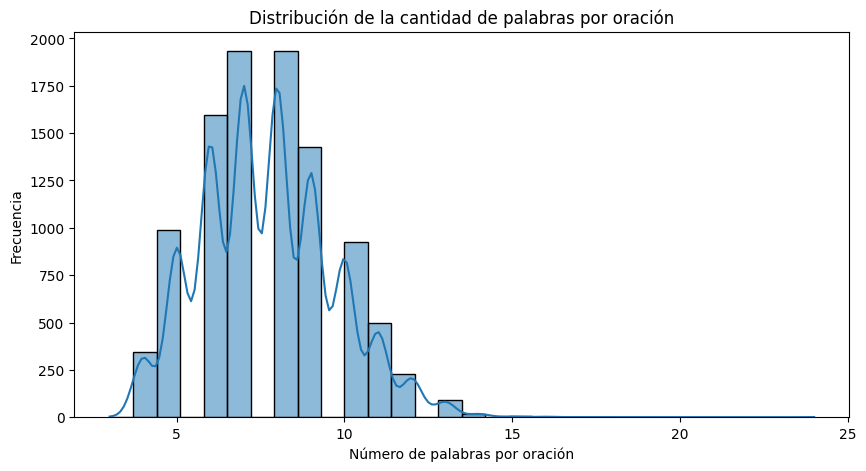

In [7]:
# Plot
plt.figure(figsize=(10, 5))
sns.histplot(data["Word Count"], bins=30, kde=True)
plt.xlabel("Words per Sentence")
plt.ylabel("Freq")
plt.title("Distribution")
plt.show()